In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from random import random

from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

Read in the auto-mpg.csv dataset using pandas and create the y label vector that we will use
throughout, which will be the MPG column. The features we will be using for regression are
the columns cylinders, displacement, horsepower, weight, and acceleration.

In [3]:
data = pd.read_csv("auto-mpg.csv")

y_vector = np.array(data.loc[:,'mpg'])
print(y_vector)

filter_by = ['cylinders','displacement','horsepower','weight', 'acceleration']
data_filtered = data.loc[:,filter_by]
print(data_filtered)


[18.  15.  18.  16.  17.  15.  14.  14.  14.  15.  15.  14.  15.  14.
 24.  22.  18.  21.  27.  26.  25.  24.  25.  26.  21.  10.  10.  11.
  9.  27.  28.  25.  19.  16.  17.  19.  18.  14.  14.  14.  14.  12.
 13.  13.  18.  22.  19.  18.  23.  28.  30.  30.  31.  35.  27.  26.
 24.  25.  23.  20.  21.  13.  14.  15.  14.  17.  11.  13.  12.  13.
 19.  15.  13.  13.  14.  18.  22.  21.  26.  22.  28.  23.  28.  27.
 13.  14.  13.  14.  15.  12.  13.  13.  14.  13.  12.  13.  18.  16.
 18.  18.  23.  26.  11.  12.  13.  12.  18.  20.  21.  22.  18.  19.
 21.  26.  15.  16.  29.  24.  20.  19.  15.  24.  20.  11.  20.  19.
 15.  31.  26.  32.  25.  16.  16.  18.  16.  13.  14.  14.  14.  29.
 26.  26.  31.  32.  28.  24.  26.  24.  26.  31.  19.  18.  15.  15.
 16.  15.  16.  14.  17.  16.  15.  18.  21.  20.  13.  29.  23.  20.
 23.  24.  25.  24.  18.  29.  19.  23.  23.  22.  25.  33.  28.  25.
 25.  26.  27.  17.5 16.  15.5 14.5 22.  22.  24.  22.5 29.  24.5 29.
 33.  20.  18.  18.5

Create an X matrix where each row is the current feature of interest.

In [4]:
row1 = np.array(data_filtered['cylinders'])
row2 = np.array(data_filtered['displacement'])
row3 = np.array(data_filtered['horsepower'])
row4 = np.array(data_filtered['weight'])
row5 = np.array( data_filtered['acceleration'])

x_matrix = [row1,row2,row3,row4,row5]


1. Create an X matrix where each row is the current feature of interest.
2. Do the train test split as indicated above. Create a plot that shows the current feature
on the x-axis and the MPG on the y-axis for the training data.
3. Use sklearn’s LinearRegression() to fit to the training data.
4. Create a prediction vector based on the training data, and calculate and print the
mean-squared error and the R2
score using sklearn on the training set.
5. Create a prediction vector based on the testing data, and calculate and print the
mean-squared error and the R2
score using sklearn on the testing set.
6. Print the coefficient and intercept parameters from the sklearn model for that feature.
7. Plot the line created from that linear regression along with points for the training data
(as one color) and the testing data (as another color). Include a legend to denote which
are training and which are testing. Note that the x-axis should be the feature you’re
predicting on and the y-axis should be MPG.
In the report, note which of the features you believe is best for predicting MPG and why
you selected that feature.

Feature cylinders: 
Mean squared error on train:  24.655233534565706
R2 on test:                   0.6092657121665905
Mean squared error on test:   21.813981353532167
R2 on test:                   0.5726149669760379
Regression coefficient:        [-3.65215459]
Regression intercept  :        43.62203602314662


Feature displacement: 
Mean squared error on train:  21.538297693471062
R2 on test:                   0.6586626770902894
Mean squared error on test:   21.2274842896114
R2 on test:                   0.5841057656051312
Regression coefficient:        [-0.06222756]
Regression intercept  :        35.765941772604975


Feature horsepower: 
Mean squared error on train:  24.47516827368345
R2 on test:                   0.6121193728863614
Mean squared error on test:   22.153237123863413
R2 on test:                   0.5659681822256185
Regression coefficient:        [-0.16259724]
Regression intercept  :        40.606097600118346


Feature weight: 
Mean squared error on train:  19.04510619658

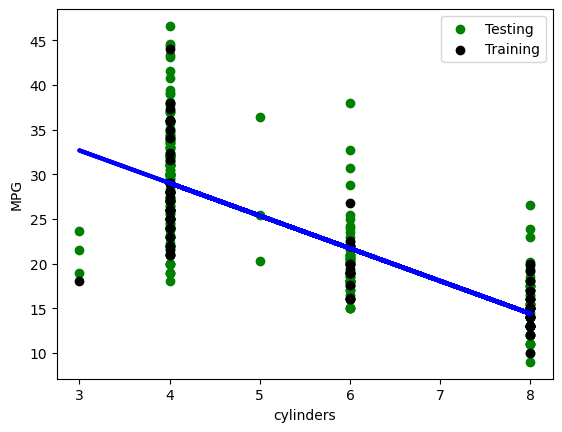

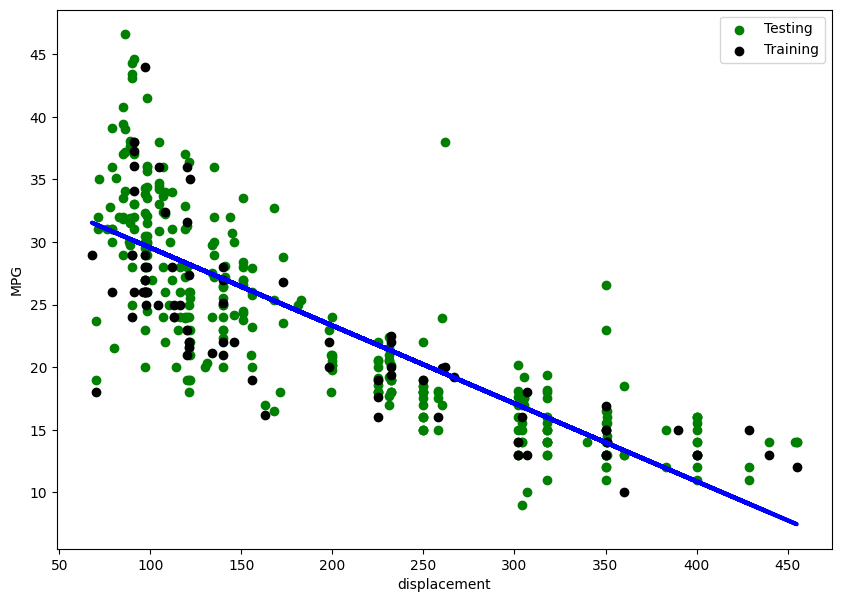

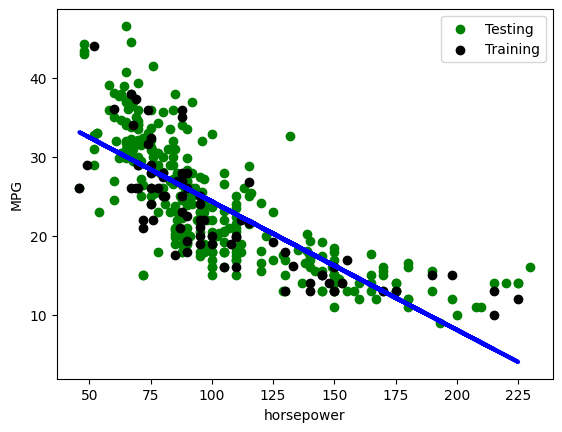

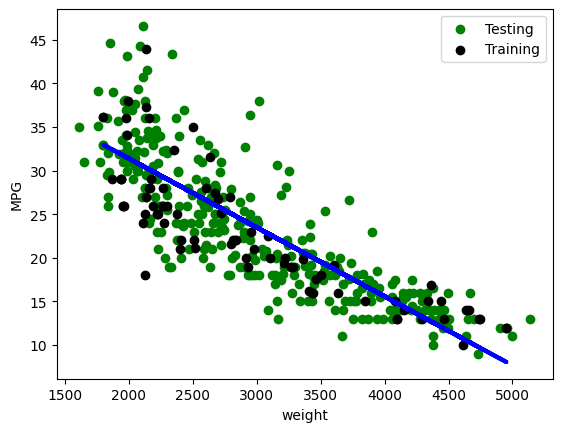

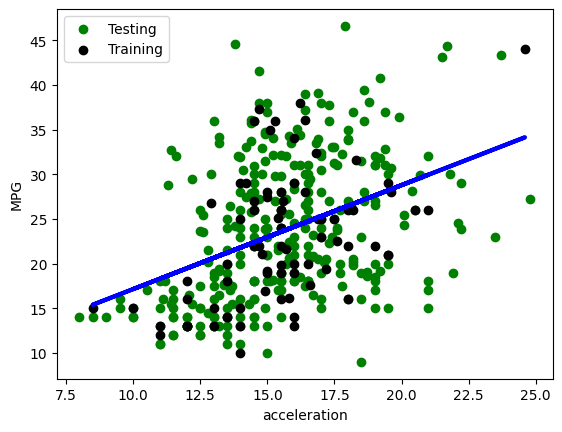

In [13]:
# cylinders feature     
fig = plt.figure(figsize=(10, 7))

for i, X in enumerate(x_matrix):
    #2
    X_tr, X_te, Y_tr,Y_te = train_test_split(X,y_vector,test_size=0.20,random_state = 42)

    #reshaping the 1D array that has a single feature to be able to use sklearn 
    X_tr = X_tr.reshape(-1,1)
    X_te = X_te.reshape(-1,1)

    #3    
    regr = linear_model.LinearRegression()
    regr.fit(X_tr, Y_tr)
    
    print("Feature {}: ".format(filter_by[i]))

    #4
    y__tr_pred = regr.predict(X_tr)
    print("Mean squared error on train: ", mean_squared_error(Y_tr, y__tr_pred))
    print("R2 on test:                  ", r2_score(Y_tr, y__tr_pred))
    #5
    y__te_pred = regr.predict(X_te)
    print("Mean squared error on test:  ", mean_squared_error(Y_te, y__te_pred))
    print("R2 on test:                  ", r2_score(Y_te, y__te_pred))
    #6
    print("Regression coefficient:       ", regr.coef_)
    print("Regression intercept  :       ", regr.intercept_)
    print("\n")
    
    plt.figure(i)
    plt.scatter(X_tr, Y_tr, color="green", label="Testing")
    plt.scatter(X_te, Y_te, color="black", label="Training")

    plt.plot(X_te, y__te_pred, color="blue", linewidth=3)
    plt.xlabel(filter_by[i])
    plt.ylabel("MPG")
    plt.legend(loc='best')

    

Question 1.2 (10 points): Combining all of the data, do the following:
1. Create an X matrix that includes all five features.
2. Do the train test split as indicated above.
3. Use sklearn’s LinearRegression() to fit to the training data.
4. Create a prediction vector based on the training data, and calculate and print the
mean-squared error and the R2
score using sklearn.
5. Create a prediction vector based on the testing data, and calculate and print the
mean-squared error and the R2
score using sklearn.
Does using all of the data improve performance over using each of the features individually?

In [6]:
#1
Xmatrix = np.c_[
    x_matrix[0],
    x_matrix[1],
    x_matrix[2],
    x_matrix[3],
    x_matrix[4]
    ]
print(len(y_vector))
#2
X_tr, X_te, Y_tr,Y_te = train_test_split(Xmatrix,y_vector,test_size=0.15,random_state = 42)

#3    
regr = linear_model.LinearRegression()
regr.fit(X_tr, Y_tr)

#4
y__tr_pred = regr.predict(X_tr)
print("Mean squared error on train: ", mean_squared_error(Y_tr, y__tr_pred))
print("R2 on test:                  ", r2_score(Y_tr, y__tr_pred))

#5
y__te_pred = regr.predict(X_te)
print("Mean squared error on test:  ", mean_squared_error(Y_te, y__te_pred))
print("R2 on train:                 ", r2_score(Y_te, y__te_pred))


392
Mean squared error on train:  17.872789903450215
R2 on test:                   0.707766373667193
Mean squared error on test:   17.309665004407268
R2 on train:                  0.7042260258153821
